In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['pdf.fonttype'] = 42

In [20]:
virusgene = np.genfromtxt("/rna/han/gigyf2_nsp2/exp_data/fclip_seq/HD/grch38_sars_cov_2/sars_cov_2_gene.txt", dtype=str)
c = pd.read_csv("~/gigyf2_nsp2/exp_data/del_rnaseq/new/processed/normcounts.csv")
c.columns = ["gene", "del_1", "del_2", "wt_1", "wt_2"]
for col in "del wt".split():
    c[col] = stats.gmean(c[[f"{col}_1", f"{col}_2"]].values, axis=1)

In [21]:
ISG = ['ADAR', 'BST2', 'CASP1', 'CCL2', 'CD70', 'CD86', 'CIITA', 'CXCL10', 'DDX58', 'EIF2AK2', 'ETV7', 'GBP1', 'HLA-A',
       'HLA-B', 'HLA-E', 'IFI16', 'IFI27', 'IFI30', 'IFI6', 'IFIH1', 'IFIT1', 'IFIT2', 'IFIT3', 'IFITM1', 'IFITM2', 'IFITM3',
       'IFNA1', 'IFNA2', 'IFNA4', 'IFNB1', 'IFNE', 'IFNW1', 'IL15', 'IRF1', 'IRF2', 'IRF7', 'IRF9', 'ISG15', 'ISG20', 'JAK2',
       'MX1', 'MX2', 'MYD88', 'NMI', 'NOS2', 'OAS1', 'OAS2', 'PML', 'PSME2', 'SHB', 'SOCS1', 'SOCS3', 'STAT1', 'STAT2', 'TAP1',
       'TICAM1', 'TIMP1', 'TLR3', 'TLR7', 'TLR9', 'TMEM173', 'TNFSF10', 'USP18', 'VEGFA', 'RSAD2']
ISG1 = ['BAG3','CAV1','CCL5','CD80','CDKN1B','CRP','CXCL10','GUSB','HLA-G','IFNAR1','IFNAR2', 'IL10','IL6','IRF3','IRF5',
        'JAK1','MAL','MET','MNDA','PML','PRKCZ','RPLP0','SH2D1A','STAT3','TLR8','TRAPPC10','TRAF3','TYK2'] #'TBP1','HPRT1',
ISG2 = ['ADAR', 'AZI2', 'B2M', 'C2', 'CASP8', 'CD274', 'CD47', 'CMPK2', 'CMTR1', 'DDX58', 'DHX58', 'DNAJA1', 'DNAJC1', 'DTX3L',
 'EHD4', 'EIF2AK2', 'ERAP1', 'FAM46A', 'FMR1', 'HERC6', 'IFI35', 'IFIH1', 'IFIT2', 'IFIT3', 'IL15RA', 'IRF1', 'IRF7', 'IRF9',
 'ISG15', 'ISG20', 'LGALS9', 'MORC3', 'MOV10', 'MX1', 'MYD88', 'N4BP1', 'NLRC5', 'NMI', 'NUB1', 'OAS', 'PARP12', 'PARP14', 
 'PARP9', 'PML', 'PSMB10', 'PSMB8', 'PSMB9', 'PSME1', 'PSME2', 'RBCK1', 'RFX5', 'RICTOR', 'RNF114', 'RNF19B', 'RNF213', 
 'RNF31', 'RSAD2', 'SAT1', 'SERTAD1', 'SHISA5', 'SLC25A28', 'SOCS1', 'SP110', 'STAT1', 'STAT2', 'TDRD7', 'TNFSF10', 'TRAFD1', 
 'TRIM21', 'TRIM25', 'UBA7', 'UBE2L6', 'USP18', 'USP25', 'WARS', 'XAF1', 'ZC3HAV1', 'ZCCHC2', 'ZNFX1']
isg = ISG + ISG1 + ISG2

/rna/han/conda/envs/py11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


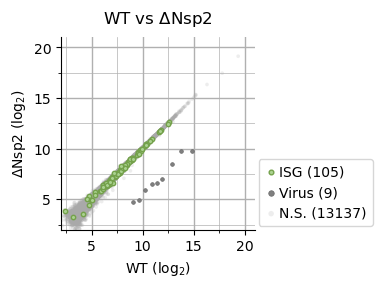

In [22]:
nocol = 'darkgrey'
viruscol = "#abd290"
virusedgecol = '#74a14b'
def scatter(ax, d, xmin, xmax, candi, label, name = None):
    df = d.copy()
    ld = df[df['gene'].isin(candi)]
    vd = df[df['gene'].isin(virusgene)]
    no = df[~df['gene'].isin(candi) & ~df['gene'].isin(virusgene)]
    x, y = "wt", "del"
    ax.scatter(-1, 0, s=5, c=viruscol, alpha=1, edgecolor = virusedgecol, lw = 1, zorder = 1, label = '%s (%d)'%(label, len(ld)))
    ax.scatter(np.log2(ld[x]), np.log2(ld[y]), s=10, c=viruscol, alpha=1, edgecolor = virusedgecol, lw = 1, zorder = 4)
    ax.scatter(np.log2(vd[x]), np.log2(vd[y]), s=7, c='grey', alpha=1, edgecolor='dimgrey', lw = .5, zorder = 4, label=f"Virus ({len(vd)})")
    ax.scatter(np.log2(no[x]), np.log2(no[y]), s=7, color=nocol, alpha=0.2, zorder = 2, label = 'N.S. (%d)'%len(no), edgecolor='none', rasterized=True)
    ax.legend(loc = (1.02, 0.02), fontsize = 10, handletextpad = 0.1, handlelength = 1, markerscale = 1.5, frameon=True)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.set_title(r'WT vs $\Delta$Nsp2', pad=10)
    ax.set_xlabel(r'WT (log$_2$)', fontsize=10)
    ax.set_ylabel(r'$\Delta$Nsp2 (log$_2$)', fontsize=10)
    ax.set_xticks(np.arange(5, xmax, 5))
    ax.set_xticks(np.arange(2.5, xmax, 5), minor=True)
    ax.set_yticks(np.arange(5, xmax, 5))
    ax.set_yticks(np.arange(2.5, xmax, 5), minor=True)
    ax.grid(True, which='major', ls = '-', lw = 1, alpha = 1, zorder = 1)
    ax.grid(True, which='minor', ls = '-', lw = .5, alpha = 1, zorder = 1)
    
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    if name is not None:
        plt.savefig('/rna/han/gigyf2_nsp2/exp_data/del_rnaseq/new/png/scatter_%s.png'%name, dpi = 300, bbox_inches='tight')
        plt.savefig('/rna/han/gigyf2_nsp2/exp_data/del_rnaseq/new/pdf/scatter_%s.pdf'%name, dpi = 1200, bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
scatter(ax, c, 2, 21, isg, "ISG", "nsp2_del_isg")